# Local Search

CSI 4106 - Fall 2024

Marcel Turcotte  
Version: Nov 4, 2024 12:35

# Preamble

## Quote of the Day

## Learning Objectives

-   **Understand** the concept and application of local search
    algorithms in optimization problems.
-   **Implement** and analyze the hill-climbing algorithm, recognizing
    its limitations such as local maxima and plateaus.
-   **Apply** effective state representation strategies in problems like
    the 8-Queens to enhance search efficiency.
-   **Explain** how simulated annealing overcomes local optima by
    allowing probabilistic acceptance of worse states.
-   **Analyze** the influence of temperature and energy difference on
    the acceptance probability in simulated annealing.
-   **Recognize** the application of simulated annealing in solving
    complex optimization problems like the Travelling Salesman Problem
    (TSP).

# Introduction

## Context

-   Focus has been on **finding paths** in **state space**.

-   Some problems prioritize the **goal state** over the **path**.

    -   Integrated-circuit design
    -   Job shop scheduling
    -   Automatic programming

The importance of the path versus the goal state hinges on the problem’s
nature. For instance, in a routing problem, the path is the critical
piece of information sought.

## 8-Queens Problem

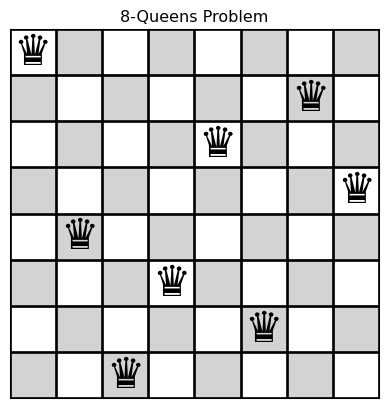

The **[8-Queens
problem](https://en.wikipedia.org/wiki/Eight_queens_puzzle)** involves
placing eight queens on an $8 \times 8$ chessboard such that **no two
queens threaten each other**, meaning no two queens share the same row,
column, or diagonal.

For an $8 \times 8$ chessboard, there exist precisely 92 distinct
solutions. Eliminating symmetry, one finds 12 fondamental solutions. In
the more general scenario of an $n \times n$ chessboard, the exact
number of solutions has been determined for all $n$ values up to and
including 27.

## Definition

> ** (Russell and Norvig 2020, 110)**
>
> **Local search algorithms** operate by searching from a **start
> state** to **neighboring states**, without keeping track of the paths,
> nor the set of states that have been reached.

Optimizes **memory utilization** while effectively solving problems in
**extensive** or **infinite state spaces**.

This algorithm lacks a systematic approach and does not ensure the
discovery of an optimal solution.

## Problem Definition

Find the “best” state according to an **objective function**, thereby
locating the **global maximum**.

This **optimization problem** is commonly referred to as **hill
climbing**.

# Hill-Climbing

## Hill-Climbing

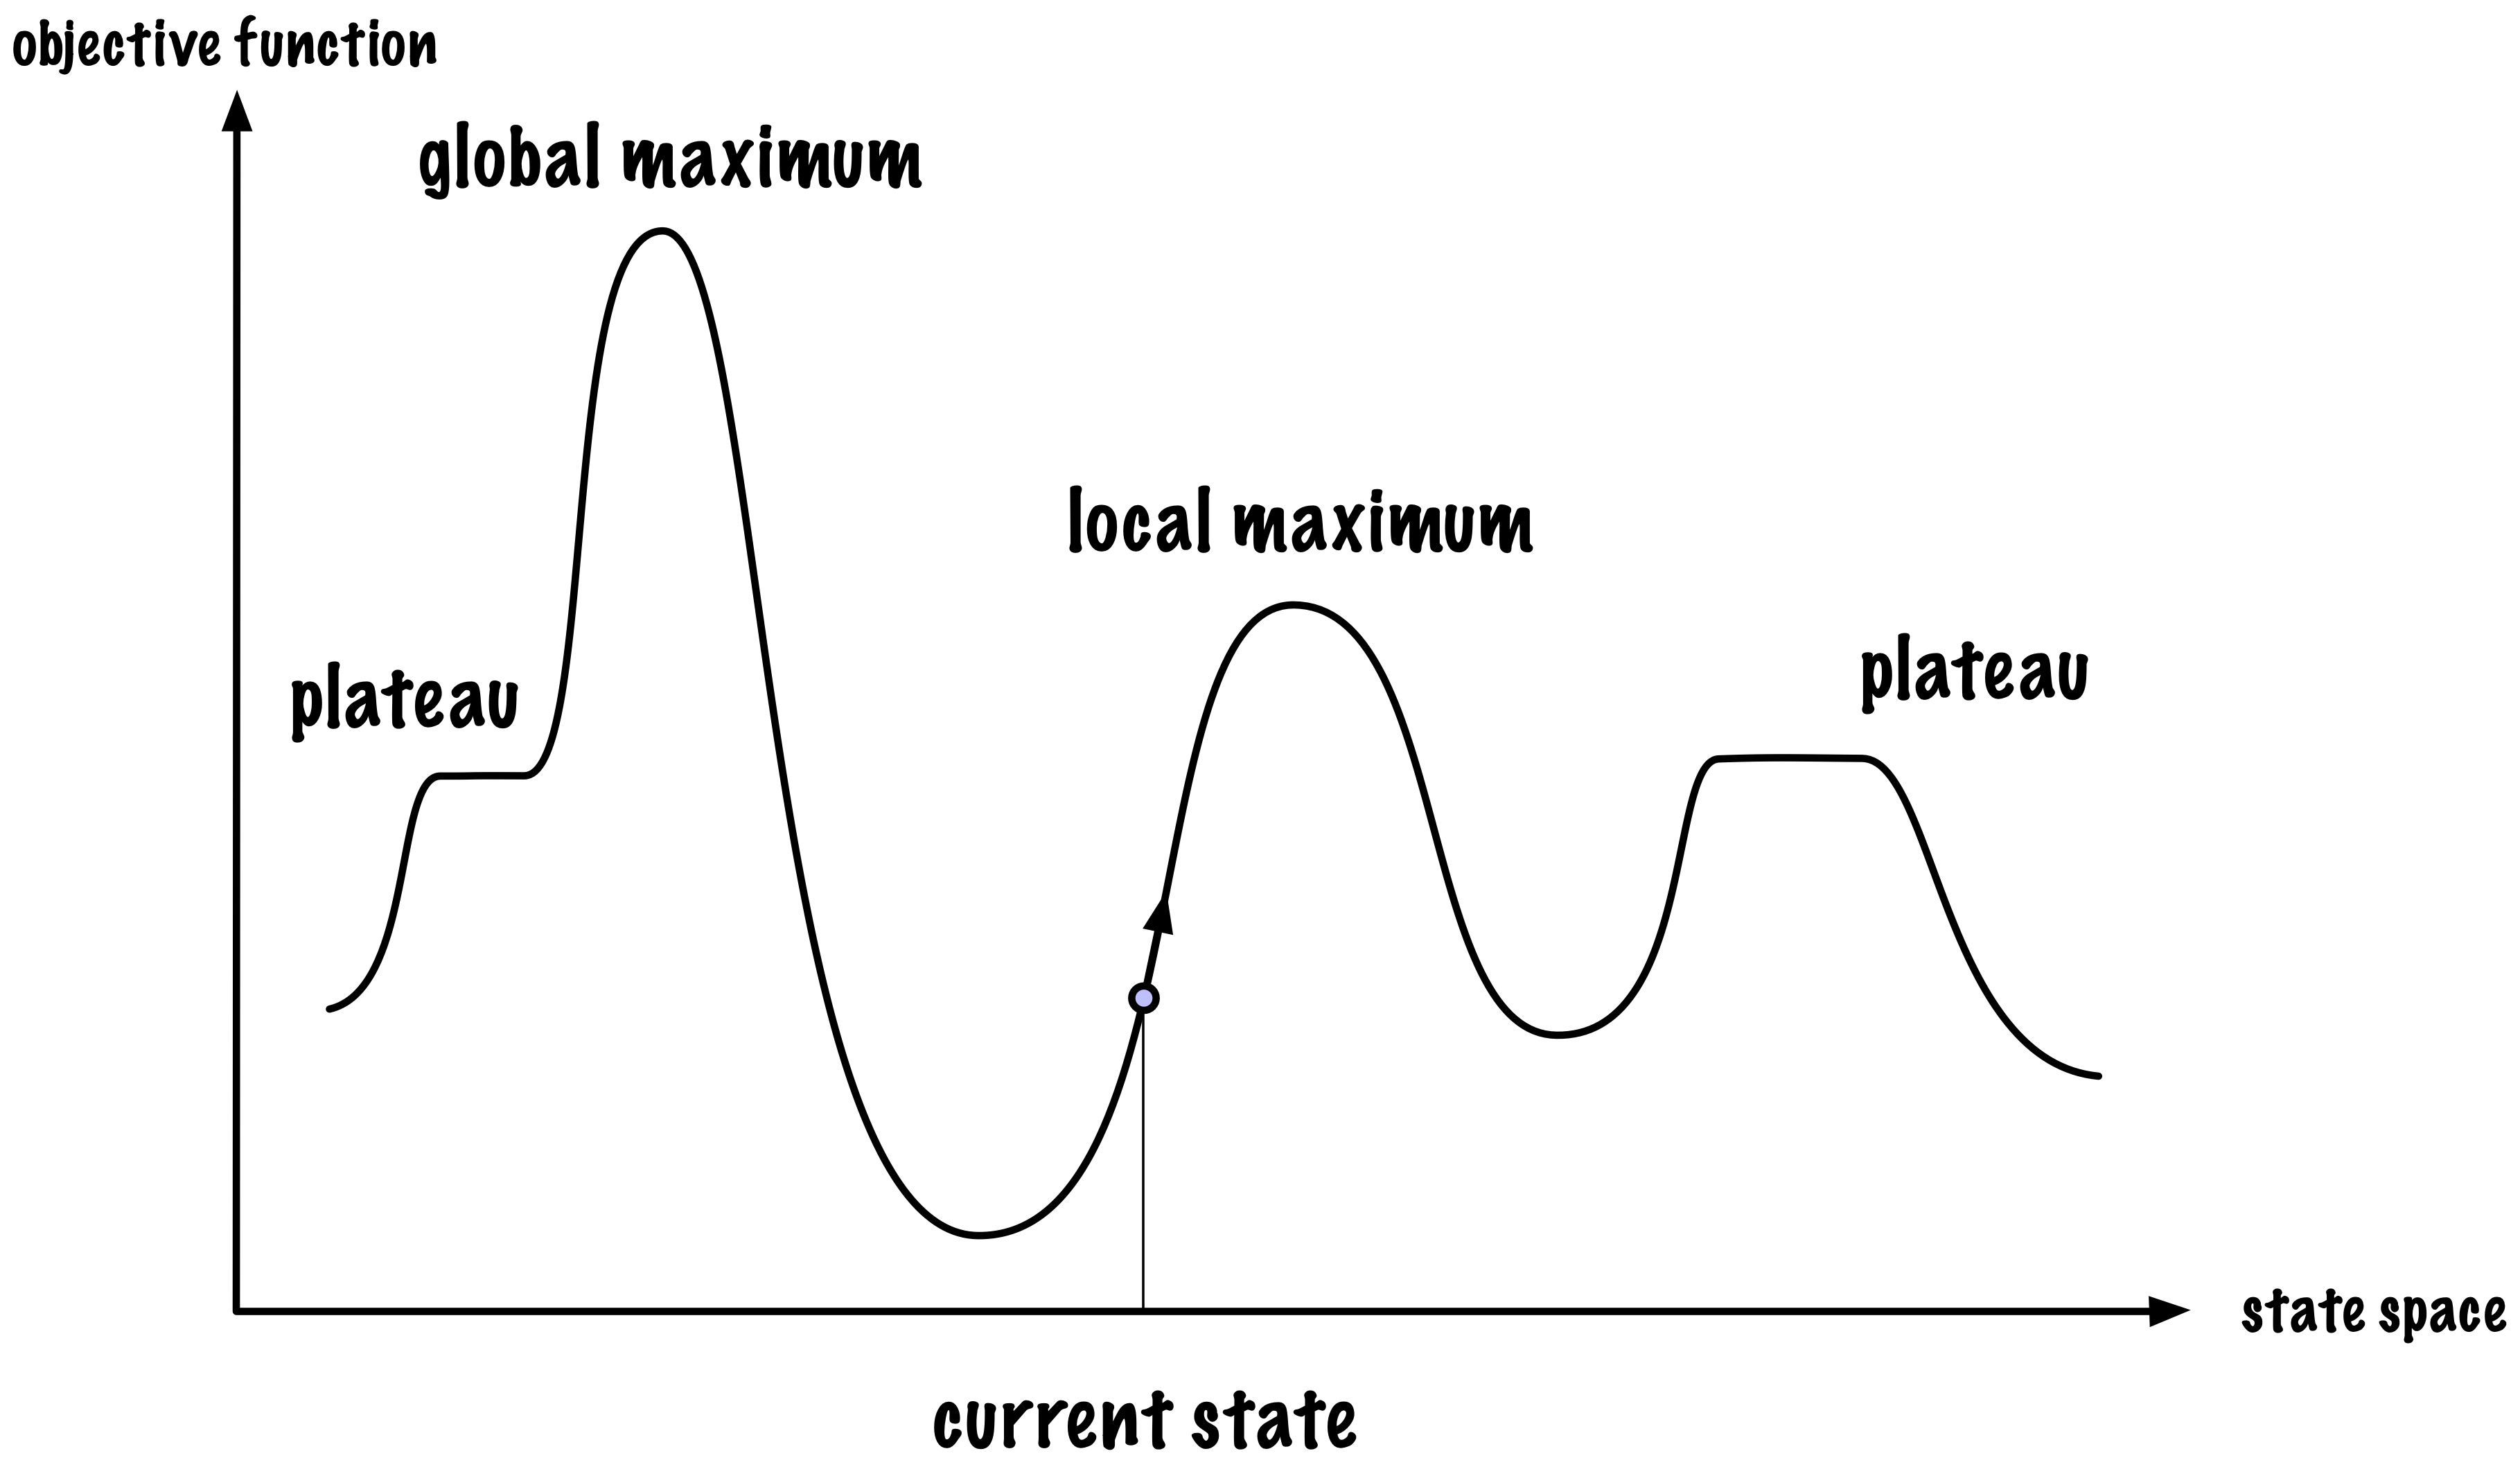

## Hill-Climbing

Given as in input a *problem*

-   *current* is the *initial state* of *problem*

-   **while** *not done* **do**

    -   *nighbour* is the highest-valued successor state of *current*
    -   if value(*neighbour*) $\le$ value(*current*) the **return**
        *current*
    -   set *current* to *neighbour*

Hill climbing neither records previously visited states nor anticipates
beyond its immediate neighbors. It keeps track of one current state
moves in the direction of the **steepest ascent**.

Notably, by inverting the sign of the objective function, the algorithm
can be adapted to seek a local minimum instead.

## 8-Queens

How would you represent the **current state**?

. . .

Why is using a grid to represent the **current state** suboptimal?

. . .

A grid representation **permits the illegal placement** of two queens in
the same column.

. . .

Instead, we can represent the state as a list ($\mathrm{state}$), where
each element corresponds to the row position of the queen in its
respective column.

In other words, $\mathrm{state}[i]$ is the row of the queen is column
$i$.

## State Representation

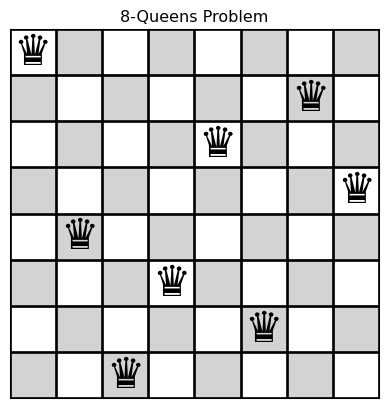

``` python
state = [0, 4, 7, 5, 2, 6, 1, 3]
```

## `create_initial_state`

In [5]:
import random
random.seed(7)

def create_initial_state(n):

    """Generates a random initial state with one queen per column."""

    return [random.randint(0, n - 1) for _ in range(n)]

**What** do you think?

## `create_initial_state`

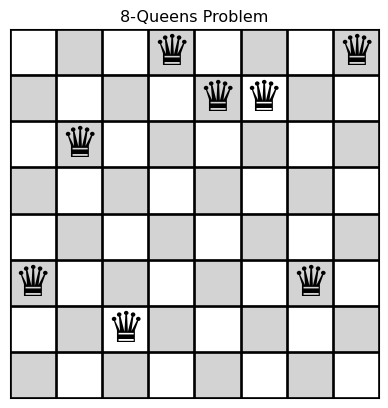

In [7]:
state 

[5, 2, 6, 0, 1, 1, 5, 0]

Permits two queens in the **same row**? **How** can this be resolved?

## Representation of 8-Queens

$8 \times 8$ chessboard.

-   **Unconstrained Placement**: $\binom{64}{8} = 4,426,165,368$
    possible configurations, representing the selection of 8 squares
    from 64.

-   **Column Constraint**: Use a list of length 8, with each entry
    indicating the row of a queen in its respective column, resulting in
    $8^8 = 16,777,216$ configurations.

-   **Row and Column Constraints**: Model board states as permutations
    of the 8 row indices, reducing configurations to $8! = 40,320$.

This underscores the significance of selecting a good representation.

## `create_initial_state`

In [8]:
import random
random.seed(7)

def create_initial_state(n):

    """Generates a permutation of numbers from 0 to n-1 as the initial state."""

    state = list(range(n))
    random.shuffle(state)

    return state

## `create_initial_state`

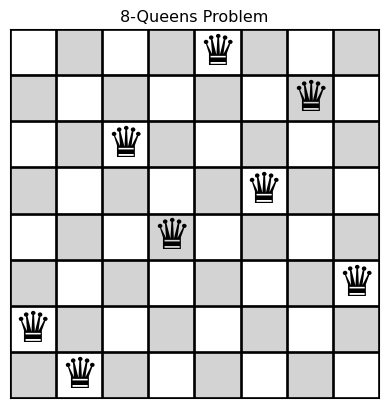

In [10]:
state 

[6, 7, 2, 4, 0, 3, 1, 5]

## `calculate_conflicts`

In [11]:
def calculate_conflicts(state):

    n = len(state)
    conflicts = 0

    for col_i in range(n):
        for col_j in range(col_i + 1, n):
            row_i = state[col_i]
            row_j = state[col_j]
            if row_i == row_j:                 # same row
                conflicts += 1
            if col_i - row_i == col_j - row_j: # same diagonal
                conflicts += 1
            if col_i + row_i == col_j + row_j: # same anti-diagonal
                conflicts += 1

    return conflicts

## `calculate_conflicts`

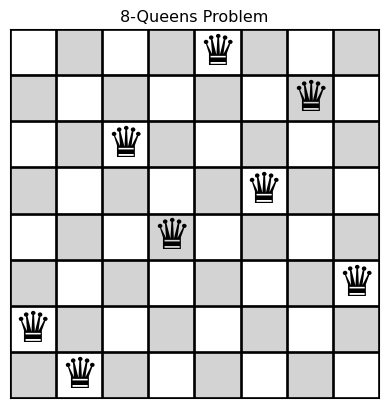

    5

## `get_neighbors_rn`

In [14]:
def get_neighbors_rn(state):
    """Generates neighboring states by moving on queen at a time to a new row."""
    neighbors = []
    n = len(state)

    for col in range(n):
        for row in range(n):
            if (state[col] != row):
              new_state = state[:] # create a copy of the state
              new_state[col] = row
              neighbors.append(new_state)

    return neighbors

Russell and Norvig (2020), $8 \times 7 = 56$ neighbours

## `get_neighbors_rn`

In [15]:
initial_state_8 = create_initial_state(8)
print(initial_state_8)
for s in get_neighbors_rn(initial_state_8):
  print(f"{s} -> # of conflicts = {calculate_conflicts(s)}")

[3, 2, 7, 1, 6, 0, 4, 5]
[0, 2, 7, 1, 6, 0, 4, 5] -> # of conflicts = 5
[1, 2, 7, 1, 6, 0, 4, 5] -> # of conflicts = 6
[2, 2, 7, 1, 6, 0, 4, 5] -> # of conflicts = 6
[4, 2, 7, 1, 6, 0, 4, 5] -> # of conflicts = 6
[5, 2, 7, 1, 6, 0, 4, 5] -> # of conflicts = 7
[6, 2, 7, 1, 6, 0, 4, 5] -> # of conflicts = 5
[7, 2, 7, 1, 6, 0, 4, 5] -> # of conflicts = 5
[3, 0, 7, 1, 6, 0, 4, 5] -> # of conflicts = 5
[3, 1, 7, 1, 6, 0, 4, 5] -> # of conflicts = 5
[3, 3, 7, 1, 6, 0, 4, 5] -> # of conflicts = 7
[3, 4, 7, 1, 6, 0, 4, 5] -> # of conflicts = 7
[3, 5, 7, 1, 6, 0, 4, 5] -> # of conflicts = 5
[3, 6, 7, 1, 6, 0, 4, 5] -> # of conflicts = 6
[3, 7, 7, 1, 6, 0, 4, 5] -> # of conflicts = 5
[3, 2, 0, 1, 6, 0, 4, 5] -> # of conflicts = 9
[3, 2, 1, 1, 6, 0, 4, 5] -> # of conflicts = 8
[3, 2, 2, 1, 6, 0, 4, 5] -> # of conflicts = 7
[3, 2, 3, 1, 6, 0, 4, 5] -> # of conflicts = 8
[3, 2, 4, 1, 6, 0, 4, 5] -> # of conflicts = 7
[3, 2, 5, 1, 6, 0, 4, 5] -> # of conflicts = 7
[3, 2, 6, 1, 6, 0, 4, 5] -> # of co

## `get_neighbors`

In [16]:
def get_neighbors(state):
    """Generates neighboring states by swapping two rows."""
    neighbors = []
    n = len(state)

    for i in range(n):
        for j in range(i + 1, n):
            new_state = state[:]
            new_state[i], new_state[j] = new_state[j], new_state[i]
            neighbors.append(new_state)

    return neighbors

$\frac{8 \times 7}{2} = 28$ neighbours

## `get_neighbors`

In [17]:
print(initial_state_8)
for s in get_neighbors(initial_state_8):
  print(f"{s} -> # of conflicts = {calculate_conflicts(s)}")

[3, 2, 7, 1, 6, 0, 4, 5]
[2, 3, 7, 1, 6, 0, 4, 5] -> # of conflicts = 8
[7, 2, 3, 1, 6, 0, 4, 5] -> # of conflicts = 6
[1, 2, 7, 3, 6, 0, 4, 5] -> # of conflicts = 3
[6, 2, 7, 1, 3, 0, 4, 5] -> # of conflicts = 3
[0, 2, 7, 1, 6, 3, 4, 5] -> # of conflicts = 7
[4, 2, 7, 1, 6, 0, 3, 5] -> # of conflicts = 3
[5, 2, 7, 1, 6, 0, 4, 3] -> # of conflicts = 6
[3, 7, 2, 1, 6, 0, 4, 5] -> # of conflicts = 5
[3, 1, 7, 2, 6, 0, 4, 5] -> # of conflicts = 3
[3, 6, 7, 1, 2, 0, 4, 5] -> # of conflicts = 7
[3, 0, 7, 1, 6, 2, 4, 5] -> # of conflicts = 4
[3, 4, 7, 1, 6, 0, 2, 5] -> # of conflicts = 3
[3, 5, 7, 1, 6, 0, 4, 2] -> # of conflicts = 4
[3, 2, 1, 7, 6, 0, 4, 5] -> # of conflicts = 7
[3, 2, 6, 1, 7, 0, 4, 5] -> # of conflicts = 5
[3, 2, 0, 1, 6, 7, 4, 5] -> # of conflicts = 10
[3, 2, 4, 1, 6, 0, 7, 5] -> # of conflicts = 4
[3, 2, 5, 1, 6, 0, 4, 7] -> # of conflicts = 4
[3, 2, 7, 6, 1, 0, 4, 5] -> # of conflicts = 5
[3, 2, 7, 0, 6, 1, 4, 5] -> # of conflicts = 5
[3, 2, 7, 4, 6, 0, 1, 5] -> # of c

## `hill_climbing`

In [18]:
import numpy as np

def hill_climbing(current_state):

    """Hill-climbing algorithm to solve the N-Queens problem."""

    current_conflicts = calculate_conflicts(current_state)

    while True:

        if current_conflicts == 0:
          return curent_state

        neighbors = get_neighbors(current_state)

        conflicts = [calculate_conflicts(neighbor) for neighbor in neighbors]

        if (min(conflicts)) > current_conflicts:
          return None # No improvement found, stuck at local minimum

        arg_best = np.argmin(conflicts)
        curent_state = neighbors[arg_best]
        current_conflicts = conflicts[arg_best]

Can you identify the problem with the above program?

## `hill_climbing` (take 2)

In [19]:
import numpy as np

MAX_SIDE_MOVES = 100

def hill_climbing(current_state):

    """Hill-climbing algorithm to solve the N-Queens problem."""

    conflicts_current_state = calculate_conflicts(current_state)
    side_moves = 0

    while True:

        if conflicts_current_state == 0:
          return current_state

        neighbors = get_neighbors(current_state)

        conflicts = [calculate_conflicts(voisin) for voisin in neighbors]

        if (min(conflicts)) > conflicts_current_state:
          return None  # No improvement, local maxima

        if (min(conflicts)) == conflicts_current_state:
          side_moves += 1  # Plateau

        if side_moves > MAX_SIDE_MOVES:
          return None

        arg_best = np.argmin(conflicts)
        current_state = neighbors[arg_best]
        conflicts_current_state = conflicts[arg_best]

## Solve

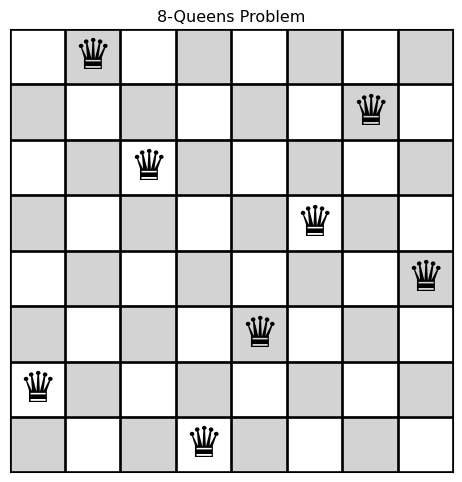

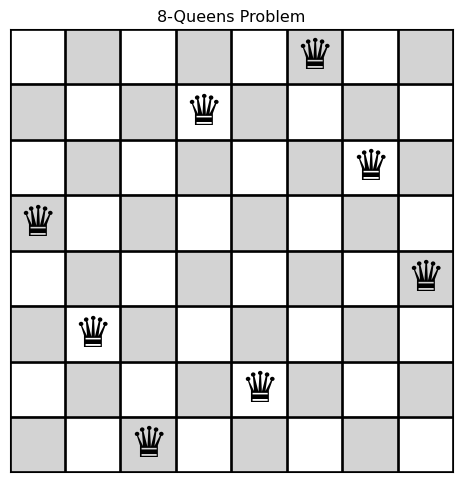

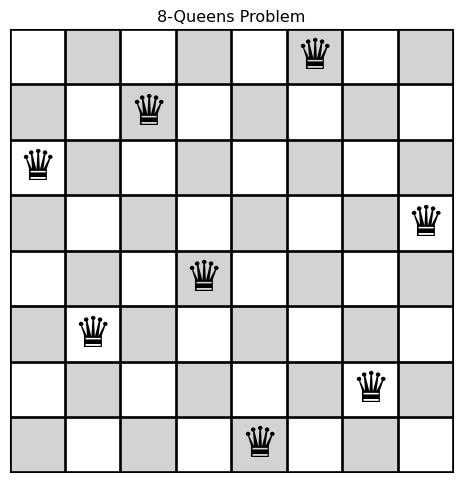

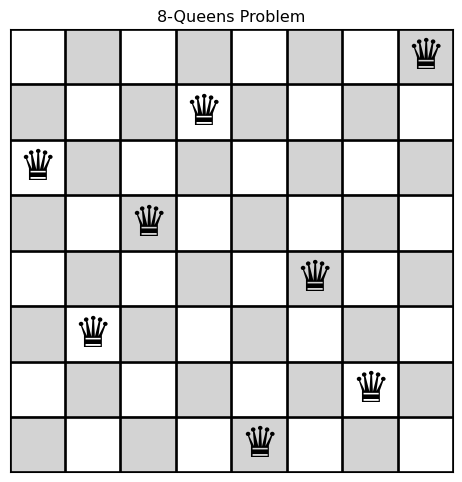

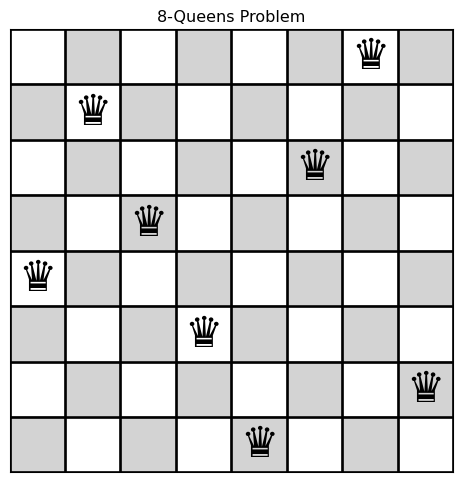

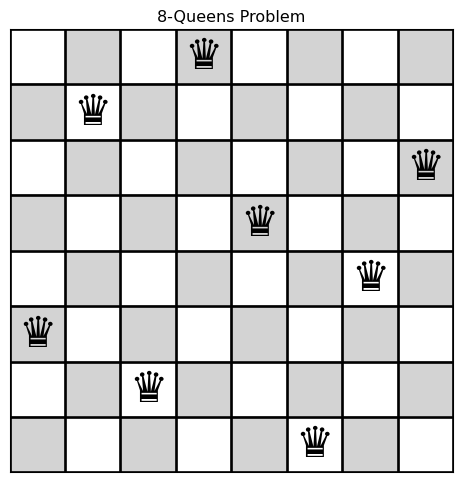

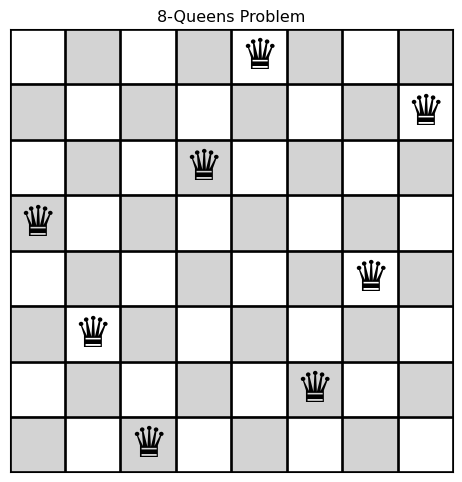

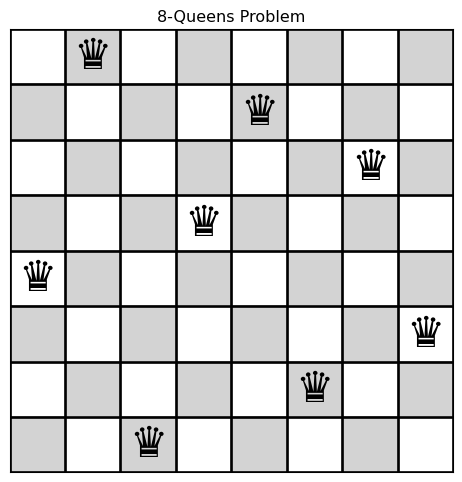

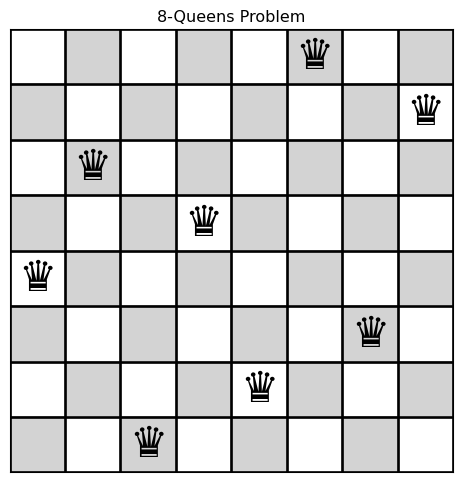

10 runs, number of solutions = 9

## Russell & Norvig

-   Hill climbing **gets stuck 86%** of the time.
    -   Successful attempts average 4 steps to a solution.
-   Permitting **100 lateral moves** boosts success rate from 14% to
    94%.
-   The problem space comprises $8^8 = 16,777,216$ states.

Has many variants, including **random-restart hill climbing**.

## Escaping a Local Optimum

What mechanisms would enable the **hill climbing** algorithm to escape
from a local optimum, whether it be a local minimum or maximum?

It needs to accept going downhill.

A random walk approach, which disregards the value of the objective
function, could theoretically locate the global maximum. However, this
method is highly impractical due to its extreme inefficiency.

## Remark

Assume the optimization problem is a **minimization task**, where the
goal is to find a solution with the **minimum cost**.

Downhill, gradient descent.

# Simulated Annealing

## Definition

**Simulated annealing** is an optimization algorithm inspired by the
annealing process in metallurgy. It probabilistically explores the
solution space by allowing **occasional uphill moves**, which helps
**escape local optima**. The algorithm **gradually reduces the
probability of accepting worse solutions** by lowering a “temperature”
parameter, ultimately converging towards an optimal or near-optimal
solution.

## Annealing

> ** (Russell and Norvig 2020, 114)**
>
> In **metallurgy**, **annealing** is the process used to temper or
> harden metals and glass by **heating them to a high temperature** and
> **then gradually cooling them**, thus allowing the material to reach a
> **low-energy crystalline state**.

The solid is heated to its melting point, causing the particles to
become randomly distributed.

Subsequently, the material is gradually cooled, allowing the particles
to reorganize into a low-energy state.

## Algorithm

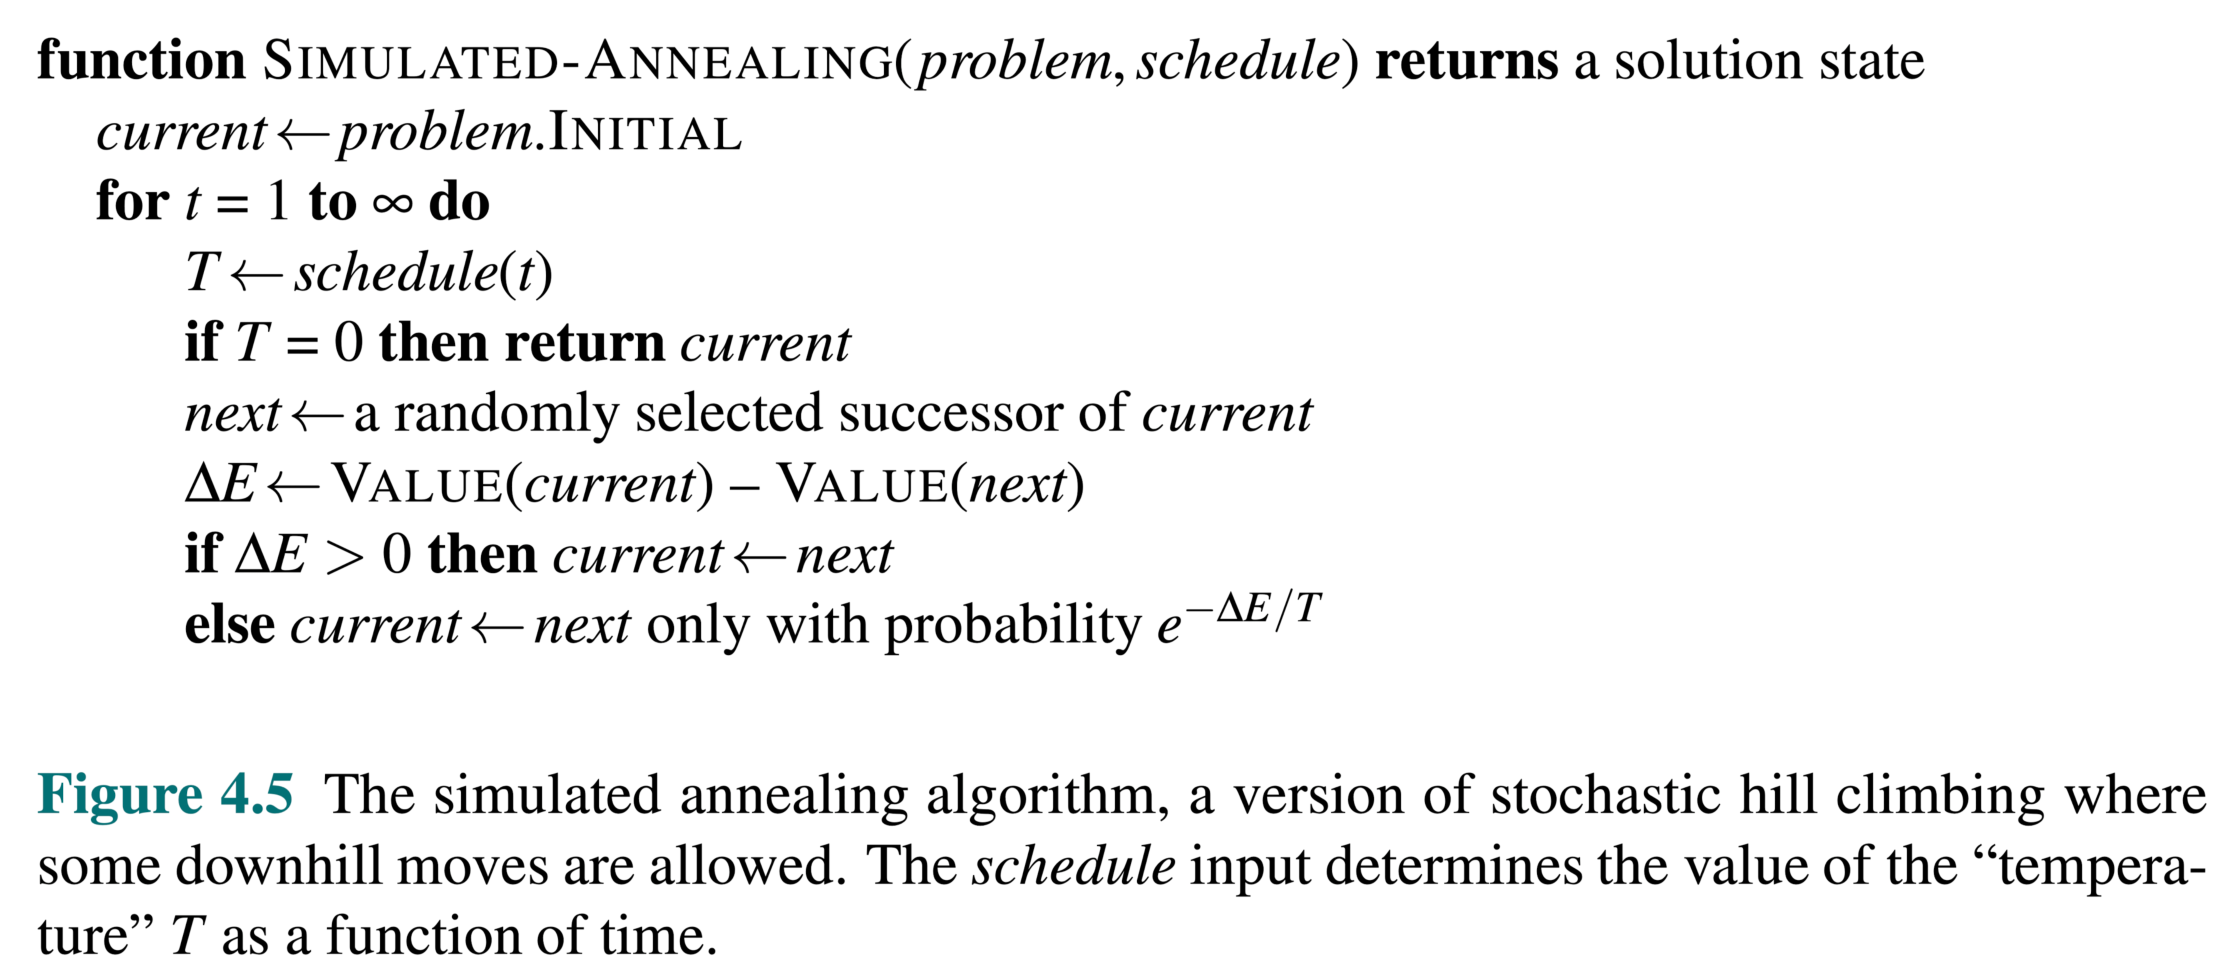

**Attribution**: (Russell and Norvig 2020, 115)

1.  This algorithm resembles hill climbing but differs by randomly
    selecting the next state rather than choosing the optimal move.

2.  If the move results in a lower objective function value, it is
    accepted unconditionally.

3.  Otherwise, acceptance is probabilistic, contingent on both
    $\Delta E$ and $T$.

## Varying $\Delta E$

<>:16: SyntaxWarning:

invalid escape sequence '\D'

<>:16: SyntaxWarning:

invalid escape sequence '\D'

/var/folders/gh/zd7z03rs5dj7q_df5gz5jlmh0000gp/T/ipykernel_3689/3828441434.py:16: SyntaxWarning:

invalid escape sequence '\D'


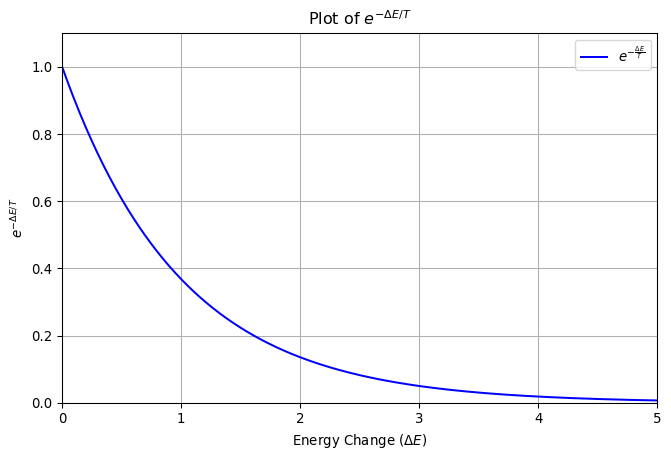

Moves resulting in **significant negative changes** (worse) to the
objective function are **less likely to be accepted**.

## Varying the temperature, $T$

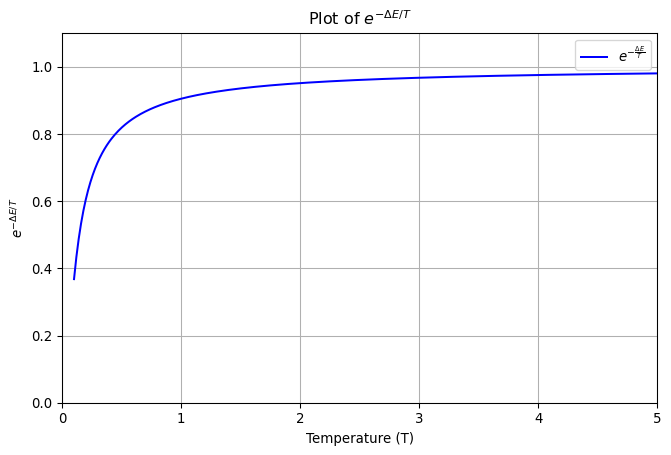

For a fixed $\Delta E$ (here $0.1$), changes are more likely to be
accepted whe $T$ is high, at the start of the algorithm.

## Varying the temperature and $\Delta E$

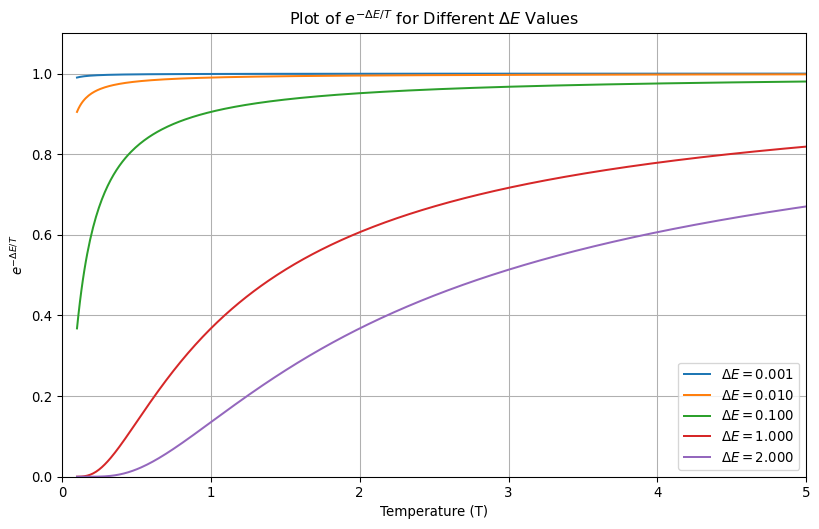

Bad moves are more likely to be accepted at the start when $T$ is high,
and less likely as $T$ decreases.

## Theory

> ** (Russell and Norvig 2020, 114)**
>
> If the schedule lowers $T$ to 0 slowly enough, then a property of the
> Boltzmann distribution, $e^{\frac{\Delta E}{T}}$, is that all the
> probability is concentrated on the global maxima, which the algorithm
> will find with probability approaching 1.

## Definition

The **Travelling Salesman Problem (TSP)** is a classic optimization
problem that seeks the shortest possible route for a salesman to visit a
set of cities, returning to the origin city, while visiting each city
exactly once.

The challenge lies in determining the most efficient path, especially as
the number of cities increases, due to the combinatorial explosion of
possible routes.

## Simulated Annealing Visualization

<https://youtu.be/NPE3zncXA5s?si=Z9rk2Kt_5pN8ChlA>

**Attribution:**
[ComputationalScientist](https://www.youtube.com/@computationalscientist6368),
Posted on 2018-01-06.

# Prologue

## Summary

-   Local search algorithms focus on finding goal states by moving
    between neighboring states without tracking paths.
-   The hill-climbing algorithm seeks the highest-valued neighbor but
    can get stuck in local maxima or plateaus.
-   Effective state representation, such as using permutations in the
    8-Queens problem, avoids illegal placements and improves
    performance.
-   Simulated annealing allows occasional uphill moves to escape local
    optima, controlled by a decreasing temperature parameter.
-   The acceptance probability in simulated annealing decreases as
    temperature lowers and energy difference increases.
-   Simulated annealing effectively solves complex problems like the
    Travelling Salesman Problem by probabilistically exploring the
    solution space.

## Next lecture

-   We will discuss population-based algorithms.

## References

Russell, Stuart, and Peter Norvig. 2020. *Artificial Intelligence: A
Modern Approach*. 4th ed. Pearson. <http://aima.cs.berkeley.edu/>.

------------------------------------------------------------------------

Marcel **Turcotte**

<Marcel.Turcotte@uOttawa.ca>

School of Electrical Engineering and **Computer Science** (EE**CS**)

University of Ottawa